You are provided with a training set and a test set of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the competition is to create a classifier capable of determining a plant's species from a photo. The list of species is as follows:

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet

1) Mounting Google Drive, Data set of 1.7 GB is uploaded in the google drive under directory "/content/drive/My Drive/CNN/plant-seedlings-classification/train

In [13]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Importing all libraries that will be needed during the course of this code

OS library will be used to traverse the flowers directory

PIL library will be used to read the images

Keras will be used to create the model

In [14]:
import pandas as pd
import os
import numpy as np
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
import cv2
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
import keras.callbacks

Under Directory "/content/drive/My Drive/CNN/plant-seedlings-classification/train" there are 12 folders categorizing each flower. Under each folder there are multiple images of one flower

In [15]:
os.chdir('/content/drive/My Drive/CNN/plant-seedlings-classification/train')

In [16]:
path=os.chdir('/content/drive/My Drive/CNN/plant-seedlings-classification/train')

In [17]:
flower_names=os.listdir()

In [18]:
print(flower_names)

['Shepherds Purse', 'Maize', 'Loose Silky-bent', 'Small-flowered Cranesbill', 'Common Chickweed', 'Sugar beet', 'Fat Hen', 'Common wheat', 'Scentless Mayweed', 'Black-grass', 'Cleavers', 'Charlock', 'model-001-0.629211-0.145263.h5', 'model-001.h5', 'model-010.h5', 'model-011.h5', 'model-012.h5', 'model-013.h5', 'model-015.h5', 'model-016.h5', 'model-018.h5', 'model-022.h5', 'output_file.csv']


Creating dictionary with the flowers name in the train directory

In [19]:
category_flowernames={'Cleavers' : '0','Common wheat' : '1', 'Black-grass' : '2', 'Maize' : '3', 'Fat Hen' : '4', 'Common Chickweed' : '5', 'Loose Silky-bent' : '6', 'Sugar beet' : '7', 'Scentless Mayweed' : '8', 'Charlock' : '9', 'Small-flowered Cranesbill' : '10', 'Shepherds Purse' : '11'}
#category_flowernames={'Cleavers' : '0', 'Fat Hen' : '1', 'Shepherds Purse' : '2'}

In [20]:
print(category_flowernames)

{'Cleavers': '0', 'Common wheat': '1', 'Black-grass': '2', 'Maize': '3', 'Fat Hen': '4', 'Common Chickweed': '5', 'Loose Silky-bent': '6', 'Sugar beet': '7', 'Scentless Mayweed': '8', 'Charlock': '9', 'Small-flowered Cranesbill': '10', 'Shepherds Purse': '11'}


In [21]:
for category,(dirpath,dirname,filelist) in enumerate(os.walk(top='/content/drive/My Drive/CNN/plant-seedlings-classification/train/')):
  #print('Category is {} and name is {}'.format(category,name[0]))
  print(dirpath)

/content/drive/My Drive/CNN/plant-seedlings-classification/train/
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Shepherds Purse
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Maize
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Loose Silky-bent
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Small-flowered Cranesbill
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Common Chickweed
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Sugar beet
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Fat Hen
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Common wheat
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Scentless Mayweed
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Black-grass
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Cleavers
/content/drive/My Drive/CNN/plant-seedlings-classification/train/C

In [22]:
path='/content/drive/My Drive/CNN/plant-seedlings-classification/train/'

In [23]:
imgs=[]
imgs_label=[]
y_test=[]
y_train=[]


#Reading flowers images from each subdirectory and assiging labels to the flowers. Flowers and labels are read in the separate array

In [24]:
for category,(dirpath,dirname,filelist) in enumerate(os.walk(top='/content/drive/My Drive/CNN/plant-seedlings-classification/train/')):
  #for dirpath in name:
  if dirpath == path :
    continue;
    
  print(category_flowernames.get(dirpath.split('/')[-1]))
  print(dirpath)
 # tmp_img=[Image.open((os.path.join(dirpath,filename))) for filename in filelist if os.path.isfile(os.path.join(dirpath,filename))]
  imgs.append([Image.open((os.path.join(dirpath,filename))).convert('RGBA') for filename in filelist if os.path.isfile(os.path.join(dirpath,filename))])
  #impic=[Image.open((os.path.join(dirpath,filename))) for filename in filelist if os.path.isfile(os.path.join(dirpath,filename))]
 # cv.imread(os.path.join(dirpath,filename) for filename in filelist if os.path.isfile(os.path.join(dirpath,filename)))
  #imgs.append(cv.resize(impic,(ScaleTo, ScaleTo)))
 ##waste imgs.append(cv.resize([Image.open((os.path.join(dirpath,filename))) for filename in filelist if os.path.isfile(os.path.join(dirpath,filename))],(ScaleTo, ScaleTo)))
  imgs_label.append([category_flowernames.get(dirpath.split('/')[-1]) for num in range(0,len(filelist))])
  print(dirpath);

11
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Shepherds Purse
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Shepherds Purse
3
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Maize
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Maize
6
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Loose Silky-bent
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Loose Silky-bent
10
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Small-flowered Cranesbill
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Small-flowered Cranesbill
5
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Common Chickweed
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Common Chickweed
7
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Sugar beet
/content/drive/My Drive/CNN/plant-seedlings-classification/train/Sugar beet
4
/content/drive/My 

In [25]:
imgs=np.array(imgs)

In [26]:
imgs.shape

(12,)

#Flowers are read in a list of list, total number of list are 12 each corresponding to one flower. Converting list of list to a list 

In [27]:
allimgs=([im for li in imgs for im in li])
alllabels=([la for li in imgs_label for la in li])

In [28]:
type(allimgs)

list

In [29]:
len(alllabels)

4750

In [30]:
#allimgs[0]

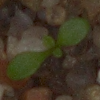

In [31]:
allimgs[1].resize((100,100))

In [32]:
allimgs_new=[]
alllabels_new=[]
allimgs_resize=[]

In [33]:
allimgs_new=allimgs
alllabels_new=alllabels

In [34]:
#for i in range(0,len(alllabels)):
 # if allimgs[i].mode == 'RGBA':
  #  continue

  #allimgs_new.append(allimgs[i])
  ###allimgs_resize.append(cv.resize(allimgs[i],(ScaleTo, ScaleTo), interpolation=cv.INTER_LINEAR))
  #alllabels_new.append(alllabels[i])

In [35]:
#allimgs=np.asarray(allimgs,dtype='float32')

#Each image is of different size , few are very big and few are very small. Hence we need to bring all images to the same size that is 118*118. Below logic convert image to the same size

In [36]:
Scale=118

In [37]:
for im1 in range(0,len(alllabels_new)):
  allimgs_new[im1]=allimgs_new[im1].resize((Scale, Scale))

#Dividing data in train, test 

In [38]:
X_train,X_test,y_train,y_test=train_test_split(allimgs_new,alllabels_new,test_size=0.2,random_state=5)

In [39]:
#X_train[3]

In [40]:
left = 155
top = 65
right = 360
bottom = 270

In [41]:
#X_train[3]=X_train[3].crop((left,top,right,bottom))

In [42]:
#for im1 in range(0,len(X_train)):
 # width, height = X_train[im1].size
  #left = 6
  #top = height / 4
  #right = 174
  #bottom = 3 * height / 4
  #X_train[im1]=X_train[im1].crop((left,top,right,bottom))
  ##X_train[im1]=X_train[im1].resize((200*200))

In [43]:
#for im1 in range(0,len(X_train)):
 # X_train[im1]=X_train[im1].resize((ScaleTo, ScaleTo))

In [44]:
X_train

[<PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2812048780>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F28120F66A0>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811D9F9B0>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811DD5E10>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811E75240>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811CFFF60>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811F7A630>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F281200B2B0>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811FECA90>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811E85E80>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811F15860>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811E75CC0>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811DFC860>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811E42550>,
 <PIL.Image.Image image mode=RGBA size=118x118 at 0x7F2811D164

#Converting list in to np.array. Since bobth Xtrain and Xtest are lists, both need to be converted into np.array

In [45]:
for im1 in range(0,len(X_train)):
    X_train[im1]=np.asarray(X_train[im1])

In [46]:
for im1 in range(0,len(X_test)):
    X_test[im1]=np.asarray(X_test[im1])

In [47]:
X_test=np.asarray(X_test,dtype='float32')

In [48]:
len(X_train)

3800

In [49]:
len(X_test)

950

In [50]:
X_train=np.asarray(X_train,dtype='float32')

In [51]:
#X_train[3700]

In [52]:
X_train=X_train/255


In [53]:
import matplotlib.pyplot as plt


In [54]:
#for i in range(8):
   # plt.subplot(2, 4, i + 1)
    #plt.figure(figsize=(10,10))
    #X_train[i]

In [55]:
from keras.utils import to_categorical

In [56]:
y_train=np.asarray(y_train,dtype='float32')

In [57]:
y_test=np.asarray(y_test,dtype='float32')

In [58]:
y_train.shape

(3800,)

In [59]:
X_train[2].shape

(118, 118, 4)

In [60]:
X_train.shape

(3800, 118, 118, 4)

In [61]:
X_test.shape

(950, 118, 118, 4)

# We have 12 categories , hence ytrain and ytest need to be one hot encoded 

In [62]:
y_train=to_categorical(y_train,num_classes=12)
y_test=to_categorical(y_test,num_classes=12)

In [63]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
X_test=X_test/255

# Defining Modelcheckpoint , so best model can be saved to a file and later reused on the test data (transfer learning)

In [65]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='model-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

#Definging Model

In [66]:
model = Sequential()

#model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(None, None, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(118, 118, 4), activation='relu',name="conv1"))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(12,activation='softmax'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 116, 116, 64)      2368      
_________________________________________________________________
batch_normalization_1 (Batch (None, 116, 116, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 114, 114, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 57, 57, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)      

#Comipling Model

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Model fit on training data and validating the data.

In [68]:
model.fit(X_train,y_train,epochs=25,batch_size=75,validation_data=(X_test,y_test),callbacks=callbacks_list)

Train on 3800 samples, validate on 950 samples
Epoch 1/25
3800/3800 [==============================] - 727s 191ms/step - loss: 1.3247 - acc: 0.5876 - val_loss: 6.1655 - val_acc: 0.1453

Epoch 00001: val_loss improved from inf to 6.16545, saving model to model-001.h5
Epoch 2/25
3800/3800 [==============================] - 725s 191ms/step - loss: 0.5311 - acc: 0.8237 - val_loss: 10.4104 - val_acc: 0.1453

Epoch 00002: val_loss did not improve from 6.16545
Epoch 3/25
3800/3800 [==============================] - 719s 189ms/step - loss: 0.3072 - acc: 0.8947 - val_loss: 12.5281 - val_acc: 0.1453

Epoch 00003: val_loss did not improve from 6.16545
Epoch 4/25
3800/3800 [==============================] - 720s 189ms/step - loss: 0.1950 - acc: 0.9379 - val_loss: 12.6423 - val_acc: 0.1453

Epoch 00004: val_loss did not improve from 6.16545
Epoch 5/25
3800/3800 [==============================] - 719s 189ms/step - loss: 0.1403 - acc: 0.9550 - val_loss: 9.2095 - val_acc: 0.1589

Epoch 00005: val_loss

#Load the best model saved in a file

In [69]:
model_loaded = keras.models.load_model('/content/drive/My Drive/model-024.h5')

In [70]:
data={'file': [],'species' : []}

In [71]:
sample_sub=pd.DataFrame(data=data)

In [72]:
imgs_test=[]

In [73]:
#path='/content/drive/My Drive/CNN/plant-seedlings-classification/test'

#Reading the test data from the file

In [74]:
for category,(dirpath,dirname,filelist) in enumerate(os.walk(top='/content/drive/My Drive/CNN/plant-seedlings-classification/test/')):
  #for dirpath in name:
  if dirpath == path :
    continue;
    
  print(category_flowernames.get(dirpath.split('/')[-1]))
  print(dirpath)
 # tmp_img=[Image.open((os.path.join(dirpath,filename))) for filename in filelist if os.path.isfile(os.path.join(dirpath,filename))]
  imgs_test.append([Image.open((os.path.join(dirpath,filename))).convert('RGBA') for filename in filelist if os.path.isfile(os.path.join(dirpath,filename))])

None
/content/drive/My Drive/CNN/plant-seedlings-classification/test/


In [75]:
imgs_test

[[<PIL.Image.Image image mode=RGBA size=214x214 at 0x7F2809AC7E80>,
  <PIL.Image.Image image mode=RGBA size=253x253 at 0x7F2808D4F6D8>,
  <PIL.Image.Image image mode=RGBA size=270x270 at 0x7F2808D4FF60>,
  <PIL.Image.Image image mode=RGBA size=288x288 at 0x7F2808D4FD68>,
  <PIL.Image.Image image mode=RGBA size=283x283 at 0x7F2808D62048>,
  <PIL.Image.Image image mode=RGBA size=313x313 at 0x7F2808D62198>,
  <PIL.Image.Image image mode=RGBA size=204x204 at 0x7F2808D62128>,
  <PIL.Image.Image image mode=RGBA size=231x231 at 0x7F2808D62320>,
  <PIL.Image.Image image mode=RGBA size=259x259 at 0x7F2808D622B0>,
  <PIL.Image.Image image mode=RGBA size=251x251 at 0x7F2808D62208>,
  <PIL.Image.Image image mode=RGBA size=269x269 at 0x7F2808D624E0>,
  <PIL.Image.Image image mode=RGBA size=276x276 at 0x7F2808D62470>,
  <PIL.Image.Image image mode=RGBA size=293x293 at 0x7F2808D62518>,
  <PIL.Image.Image image mode=RGBA size=308x308 at 0x7F2808D62780>,
  <PIL.Image.Image image mode=RGBA size=333x333 

In [76]:
sample_sub['file']=filelist
allimgs_test=[]

#Preprocessing the images in the test data

In [77]:
allimgs_test=([im for li in imgs_test for im in li])

In [78]:
len(allimgs_test)

794

In [79]:
for im1 in range(0,len(allimgs_test)):
  allimgs_test[im1]=allimgs_test[im1].resize((Scale, Scale))

In [80]:
for im1 in range(0,len(allimgs_test)):
    allimgs_test[im1]=np.asarray(allimgs_test[im1])

In [81]:
allimgs_test=np.asarray(allimgs_test,dtype='float32')

In [82]:
allimgs_test=allimgs_test/255

#Predicting the images classes using loaded model.

In [83]:
model_loaded.predict_classes(allimgs_test)

array([ 5,  4, 10,  7,  6,  7,  4,  6,  5,  4,  2, 10,  4,  7,  8,  7,  8,
        8, 10, 11,  5,  7, 11,  5,  7,  3, 11,  8,  8,  6,  5,  6,  5, 11,
        6,  6,  7,  6,  5, 10,  5,  1, 10,  3,  3,  8,  4,  7,  6,  3, 10,
        3,  6,  4,  7,  0,  0,  9, 10,  1,  9,  6,  7,  0,  4,  6,  3, 10,
        8,  0,  6,  5,  1,  8,  5,  6,  8,  5,  6,  8,  7,  5,  1,  0,  8,
       11,  6,  7,  5,  9,  4,  6,  6,  4,  8, 10,  6,  5, 10,  3,  8,  4,
        4,  4,  4,  7,  8,  5,  0,  0,  9,  6, 11,  5,  7, 11,  0,  9,  7,
        5,  7,  6,  6,  0,  9, 10,  3,  1,  4,  5,  5,  7,  5,  4,  7,  4,
        6,  9,  5,  1,  6, 11, 10,  4,  5,  9, 10,  7,  7,  1,  8,  6,  6,
        3,  5,  5, 10,  0,  6,  4,  9, 11,  6,  5, 11,  6,  8, 11, 11,  5,
        1,  5,  5, 11,  3,  2,  0,  2,  6,  6, 10,  6,  6,  6,  5,  5,  5,
        4,  4, 10,  8,  9,  6,  2,  5,  6,  9,  5,  1,  6,  0,  9,  9,  6,
        0,  4, 10,  4, 11,  5,  4,  6,  3, 10,  0,  9,  4,  5, 10,  8,  6,
        6, 10,  1,  5,  5

In [84]:
predict_classes=model_loaded.predict_classes(allimgs_test)

In [85]:
sample_sub['species']=predict_classes

In [86]:
sample_sub.head()

,file,species
0,0086a6340.png,5
1,003d61042.png,4
2,0021e90e4.png,10
3,007b3da8b.png,7
4,00d090cde.png,6


In [87]:
sample_sub.replace({'species' : category_flowernames.keys},inplace=True)

#Saving predicted images and their corresponding labels to the output file.

In [88]:
sample_sub.to_csv('output_file.csv')

In [89]:
inv_map = {v: k for k, v in category_flowernames.items()}

In [90]:
inv_map

{'0': 'Cleavers',
 '1': 'Common wheat',
 '10': 'Small-flowered Cranesbill',
 '11': 'Shepherds Purse',
 '2': 'Black-grass',
 '3': 'Maize',
 '4': 'Fat Hen',
 '5': 'Common Chickweed',
 '6': 'Loose Silky-bent',
 '7': 'Sugar beet',
 '8': 'Scentless Mayweed',
 '9': 'Charlock'}

In [91]:
sample_sub['species']=sample_sub['species'].map(inv_map)